Starting with importing **Libraries** 

In [ ]:
#NLTK libraries
import nltk
import re
import string
from wordcloud import WordCloud,STOPWORDS
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer
from collections import Counter
from imblearn.over_sampling import SMOTE
# Machine Learning libraries
import sklearn 
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn import svm, datasets
from sklearn import preprocessing 


#Metrics libraries
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

#Visualization libraries
import matplotlib.pyplot as plt 
from matplotlib import rcParams
import seaborn as sns
from textblob import TextBlob
from plotly import tools
import plotly.graph_objs as go
from plotly.offline import iplot
%matplotlib inline

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

#Other miscellaneous libraries
from scipy import interp
from itertools import cycle
import cufflinks as cf
from collections import defaultdict
from collections import Counter
from imblearn.over_sampling import SMOTE

## **Importing the Dataset**

In [ ]:
import numpy as np 
import pandas as pd 

reviews = pd.read_csv('./Musical_instruments_reviews.csv')
print('Dataset of Reviews for sentiment Analysis :')
reviews.head()

Dataset of Reviews for sentiment Analysis :


reviewerID        asin  \
0  A2IBPI20UZIR0U  1384719342   
1  A14VAT5EAX3D9S  1384719342   
2  A195EZSQDW3E21  1384719342   
3  A2C00NNG1ZQQG2  1384719342   
4   A94QU4C90B1AX  1384719342   

                                       reviewerName   helpful  \
0  cassandra tu "Yeah, well, that's just like, u...    [0, 0]   
1                                              Jake  [13, 14]   
2                     Rick Bennette "Rick Bennette"    [1, 1]   
3                         RustyBill "Sunday Rocker"    [0, 0]   
4                                     SEAN MASLANKA    [0, 0]   

                                          reviewText  overall  \
0  Not much to write about here, but it does exac...      5.0   
1  The product does exactly as it should and is q...      5.0   
2  The primary job of this device is to block the...      5.0   
3  Nice windscreen protects my MXL mic and preven...      5.0   
4  This pop filter is great. It looks and perform...      5.0   

                                 summary  unixReviewTime   reviewTime  
0                                   good      1393545600  02 28, 2014  
1                                   Jake      1363392000  03 16, 2013  
2                   It Does The Job Well      1377648000  08 28, 2013  
3          GOOD WINDSCREEN FOR THE MONEY      1392336000  02 14, 2014  
4  No more pops when I record my vocals.      1392940800  02 21, 2014

In [ ]:
## print shape of dataset with rows and columns and information 
print ("Below is the shape of our data (row, column):"+ str(reviews.shape))
print ("Also, some more information about reviews dataset: " + str(reviews.info()))

Below is the shape of our data (row, column):(10261, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10261 entries, 0 to 10260
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviewerID      10261 non-null  object 
 1   asin            10261 non-null  object 
 2   reviewerName    10234 non-null  object 
 3   helpful         10261 non-null  object 
 4   reviewText      10254 non-null  object 
 5   overall         10261 non-null  float64
 6   summary         10261 non-null  object 
 7   unixReviewTime  10261 non-null  int64  
 8   reviewTime      10261 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 721.6+ KB
Also, some more information about reviews dataset: None


#**Dataset Attributes :**

This dataset has reviewer ID , User ID, Reviewer Name, Reviewer text, helpful, Summary(obtained from Reviewer text), Overall Rating on a scale 5 and Review time.

###**Description of columns in the file:**

reviewerID - ID of the reviewer, e.g. A2SUAM1J3GNN3B

asin - ID of the product, e.g. 0000013714

reviewerName - name of the reviewer

helpful - helpfulness rating of the review, e.g. 2/3

reviewText - text of the review

overall - rating of the product

summary - summary of the review

unixReviewTime - time of the review (unix time)

reviewTime - time of the review 

### **Pre - Processing the dataset**

In [ ]:
#Checking for null values
print('Finding the null values in the dataset:')
reviews.isnull().sum()

Finding the null values in the dataset:


reviewerID         0
asin               0
reviewerName      27
helpful            0
reviewText         7
overall            0
summary            0
unixReviewTime     0
reviewTime         0
dtype: int64

There are null values in reviewerNames and reviewText Fields. Reviewer names doesn't add any value as reviewID is present in the dataset For reviewText dropping wouldn't be a problem as there are only 7 null values possibly due to ratings.



In [ ]:
reviews['reviewText'] = reviews['reviewText'].fillna('Missing')

In [ ]:
reviews.isnull().sum()

reviewerID         0
asin               0
reviewerName      27
helpful            0
reviewText         0
overall            0
summary            0
unixReviewTime     0
reviewTime         0
dtype: int64

**Figuring out the Sentiments**
The sentiments of reviews are decided on the overall score.


1.   If score > 3 , Sentiment = *Positive*
2.   If score < 3 , Sentiment = *Negative*
1.   If score = 3, Sentiment = *Neutral*






In [ ]:
print('The distribution of categories of sentiment based on values of Overall ratings:') 
reviews['overall'].value_counts()

The distribution of categories of sentiment based on values of Overall ratings:


5.0    6938
4.0    2084
3.0     772
2.0     250
1.0     217
Name: overall, dtype: int64

Combining reviewtext and summary column will not contradict the nature of sentiments. Hence we can drop these 

In [ ]:
reviews['reviews'] = reviews['reviewText'] + reviews['summary']
reviews = reviews.drop(['reviewText', 'summary'], axis=1)
reviews.head()

reviewerID        asin  \
0  A2IBPI20UZIR0U  1384719342   
1  A14VAT5EAX3D9S  1384719342   
2  A195EZSQDW3E21  1384719342   
3  A2C00NNG1ZQQG2  1384719342   
4   A94QU4C90B1AX  1384719342   

                                       reviewerName   helpful  overall  \
0  cassandra tu "Yeah, well, that's just like, u...    [0, 0]      5.0   
1                                              Jake  [13, 14]      5.0   
2                     Rick Bennette "Rick Bennette"    [1, 1]      5.0   
3                         RustyBill "Sunday Rocker"    [0, 0]      5.0   
4                                     SEAN MASLANKA    [0, 0]      5.0   

   unixReviewTime   reviewTime  \
0      1393545600  02 28, 2014   
1      1363392000  03 16, 2013   
2      1377648000  08 28, 2013   
3      1392336000  02 14, 2014   
4      1392940800  02 21, 2014   

                                             reviews  
0  Not much to write about here, but it does exac...  
1  The product does exactly as it should and is q...  
2  The primary job of this device is to block the...  
3  Nice windscreen protects my MXL mic and preven...  
4  This pop filter is great. It looks and perform...

##Creating a *Sentiment* column in a dataset and labelling them 
😞 😐 🙂

In [ ]:
def sent(rating):
    if rating['overall'] == 3:
        value = 'Neutral'
    elif rating['overall'] > 3:
        value = 'Positive'
    else:
        value = 'Negative'
    return value

In [ ]:
#Applying the function in our new column
reviews['Sentiment'] = reviews.apply(sent, axis=1)
reviews.head()

reviewerID        asin  \
0  A2IBPI20UZIR0U  1384719342   
1  A14VAT5EAX3D9S  1384719342   
2  A195EZSQDW3E21  1384719342   
3  A2C00NNG1ZQQG2  1384719342   
4   A94QU4C90B1AX  1384719342   

                                       reviewerName   helpful  overall  \
0  cassandra tu "Yeah, well, that's just like, u...    [0, 0]      5.0   
1                                              Jake  [13, 14]      5.0   
2                     Rick Bennette "Rick Bennette"    [1, 1]      5.0   
3                         RustyBill "Sunday Rocker"    [0, 0]      5.0   
4                                     SEAN MASLANKA    [0, 0]      5.0   

   unixReviewTime   reviewTime  \
0      1393545600  02 28, 2014   
1      1363392000  03 16, 2013   
2      1377648000  08 28, 2013   
3      1392336000  02 14, 2014   
4      1392940800  02 21, 2014   

                                             reviews Sentiment  
0  Not much to write about here, but it does exac...  Positive  
1  The product does exactly as it should and is q...  Positive  
2  The primary job of this device is to block the...  Positive  
3  Nice windscreen protects my MXL mic and preven...  Positive  
4  This pop filter is great. It looks and perform...  Positive

In [ ]:
print('Total count of sentiments:')
reviews['Sentiment'].value_counts()

Total count of sentiments:


Positive    9022
Neutral      772
Negative     467
Name: Sentiment, dtype: int64

In [ ]:
# Splitting the date 
re_new = reviews["reviewTime"].str.split(",", n = 1, expand = True) 
  
# adding month to the main dataset 
reviews["date"] = re_new[0] 
  
# adding day to the main dataset 
reviews["year"] = re_new[1] 

re_new1 = reviews["date"].str.split(" ", n = 1, expand = True) 

# adding month to the main dataset 
reviews["month"] = re_new1[0] 

# adding day to the main dataset 
reviews["day"] = re_new1[1]

reviews = reviews.drop(['reviewTime', 'date'], axis=1)
reviews.head() 

reviewerID        asin  \
0  A2IBPI20UZIR0U  1384719342   
1  A14VAT5EAX3D9S  1384719342   
2  A195EZSQDW3E21  1384719342   
3  A2C00NNG1ZQQG2  1384719342   
4   A94QU4C90B1AX  1384719342   

                                       reviewerName   helpful  overall  \
0  cassandra tu "Yeah, well, that's just like, u...    [0, 0]      5.0   
1                                              Jake  [13, 14]      5.0   
2                     Rick Bennette "Rick Bennette"    [1, 1]      5.0   
3                         RustyBill "Sunday Rocker"    [0, 0]      5.0   
4                                     SEAN MASLANKA    [0, 0]      5.0   

   unixReviewTime                                            reviews  \
0      1393545600  Not much to write about here, but it does exac...   
1      1363392000  The product does exactly as it should and is q...   
2      1377648000  The primary job of this device is to block the...   
3      1392336000  Nice windscreen protects my MXL mic and preven...   
4      1392940800  This pop filter is great. It looks and perform...   

  Sentiment   year month day  
0  Positive   2014    02  28  
1  Positive   2013    03  16  
2  Positive   2013    08  28  
3  Positive   2014    02  14  
4  Positive   2014    02  21

In [ ]:
reviews['year'].value_counts()

 2013    4055
 2014    2679
 2012    1936
 2011    1007
 2010     350
 2009     128
 2008      63
 2007      22
 2006      10
 2004       7
 2005       4
Name: year, dtype: int64

In [ ]:
print('Year - wise count of sentiments:')
reviews.groupby(['year','Sentiment']).size()

Year - wise count of sentiments:


year   Sentiment
 2004  Positive        7
 2005  Positive        4
 2006  Negative        1
       Neutral         1
       Positive        8
 2007  Negative        1
       Positive       21
 2008  Negative        2
       Neutral         7
       Positive       54
 2009  Negative        5
       Neutral         8
       Positive      115
 2010  Negative       16
       Neutral        20
       Positive      314
 2011  Negative       46
       Neutral        84
       Positive      877
 2012  Negative       85
       Neutral       130
       Positive     1721
 2013  Negative      170
       Neutral       319
       Positive     3566
 2014  Negative      141
       Neutral       203
       Positive     2335
dtype: int64

## **Finding the helpfulness of the reviews in our dataset**

This feature will be in format [a,b] format which means that a out of b people found that review helpful.

At, last helpful_review feature created which returns a/b value from [ab]


In [ ]:
newreview = reviews["helpful"].str.split(",", n = 1, expand = True)
newreview1 = newreview[0].str.split("[", n = 1, expand = True)
newreview2 = newreview[1].str.split("]", n = 1, expand = True)

#Resetting the index
newreview1.reset_index(drop=True, inplace=True)
newreview2.reset_index(drop=True, inplace=True)

#Dropping empty columns due to splitting 
newreview1 = newreview1.drop([0], axis=1)
newreview2 = newreview2.drop([1], axis=1)

#Concatenating the splitted columns
helpfulreview = pd.concat([newreview1, newreview2], axis=1)
reviews.head()

reviewerID        asin  \
0  A2IBPI20UZIR0U  1384719342   
1  A14VAT5EAX3D9S  1384719342   
2  A195EZSQDW3E21  1384719342   
3  A2C00NNG1ZQQG2  1384719342   
4   A94QU4C90B1AX  1384719342   

                                       reviewerName   helpful  overall  \
0  cassandra tu "Yeah, well, that's just like, u...    [0, 0]      5.0   
1                                              Jake  [13, 14]      5.0   
2                     Rick Bennette "Rick Bennette"    [1, 1]      5.0   
3                         RustyBill "Sunday Rocker"    [0, 0]      5.0   
4                                     SEAN MASLANKA    [0, 0]      5.0   

   unixReviewTime                                            reviews  \
0      1393545600  Not much to write about here, but it does exac...   
1      1363392000  The product does exactly as it should and is q...   
2      1377648000  The primary job of this device is to block the...   
3      1392336000  Nice windscreen protects my MXL mic and preven...   
4      1392940800  This pop filter is great. It looks and perform...   

  Sentiment   year month day  
0  Positive   2014    02  28  
1  Positive   2013    03  16  
2  Positive   2013    08  28  
3  Positive   2014    02  14  
4  Positive   2014    02  21

In [ ]:
#Converting into integer types
helpfulreview[0] = helpfulreview[0].astype(str).astype(int)
helpfulreview[1] = helpfulreview[1].astype(str).astype(int)

#Dividing the two columns, we have 0 in the second columns when divided gives error, 
#so I'm ignoring those errors
try:
  helpfulreview['result'] = helpfulreview[1]/helpfulreview[0]
except ZeroDivisionError:
  helpfulreview['result']=0

#Filling the NaN values(created due to dividing) with 0
helpfulreview['result'] = helpfulreview['result'].fillna(0)

#Rounding of the results to two decimal places
helpfulreview['result'] = helpfulreview['result'].round(2) 

#Attaching the results to a new column of the main dataframe
reviews['helpful_review'] = helpfulreview['result']

#dropping the helpful column from main dataframe
reviews = reviews.drop(['helpful'], axis=1)
reviews.head()

reviewerID        asin  \
0  A2IBPI20UZIR0U  1384719342   
1  A14VAT5EAX3D9S  1384719342   
2  A195EZSQDW3E21  1384719342   
3  A2C00NNG1ZQQG2  1384719342   
4   A94QU4C90B1AX  1384719342   

                                       reviewerName  overall  unixReviewTime  \
0  cassandra tu "Yeah, well, that's just like, u...      5.0      1393545600   
1                                              Jake      5.0      1363392000   
2                     Rick Bennette "Rick Bennette"      5.0      1377648000   
3                         RustyBill "Sunday Rocker"      5.0      1392336000   
4                                     SEAN MASLANKA      5.0      1392940800   

                                             reviews Sentiment   year month  \
0  Not much to write about here, but it does exac...  Positive   2014    02   
1  The product does exactly as it should and is q...  Positive   2013    03   
2  The primary job of this device is to block the...  Positive   2013    08   
3  Nice windscreen protects my MXL mic and preven...  Positive   2014    02   
4  This pop filter is great. It looks and perform...  Positive   2014    02   

  day  helpful_review  
0  28            0.00  
1  16            0.93  
2  28            1.00  
3  14            0.00  
4  21            0.00

In [ ]:
reviews['helpful_review'].value_counts()

0.00    7215
1.00    2040
0.50     266
0.67     136
0.75     111
        ... 
0.56       1
0.15       1
0.13       1
0.43       1
0.69       1
Name: helpful_review, Length: 65, dtype: int64

The helpful_review gives rate value between 0.00 and 1.00.

0.00 indicates that the review is not much helpful
1.00 indicates that the review is very helpful.

In [ ]:
#Removing unnecessary columns
reviews = reviews.drop(['reviewerName','unixReviewTime'], axis=1)

In [ ]:
reviews.head()

reviewerID        asin  overall  \
0  A2IBPI20UZIR0U  1384719342      5.0   
1  A14VAT5EAX3D9S  1384719342      5.0   
2  A195EZSQDW3E21  1384719342      5.0   
3  A2C00NNG1ZQQG2  1384719342      5.0   
4   A94QU4C90B1AX  1384719342      5.0   

                                             reviews Sentiment   year month  \
0  Not much to write about here, but it does exac...  Positive   2014    02   
1  The product does exactly as it should and is q...  Positive   2013    03   
2  The primary job of this device is to block the...  Positive   2013    08   
3  Nice windscreen protects my MXL mic and preven...  Positive   2014    02   
4  This pop filter is great. It looks and perform...  Positive   2014    02   

  day  helpful_review  
0  28            0.00  
1  16            0.93  
2  28            1.00  
3  14            0.00  
4  21            0.00

In [ ]:
def clean_review(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

reviews['reviews'] = reviews['reviews'].apply(lambda x: clean_review(x))
reviews.head()

reviewerID        asin  overall  \
0  A2IBPI20UZIR0U  1384719342      5.0   
1  A14VAT5EAX3D9S  1384719342      5.0   
2  A195EZSQDW3E21  1384719342      5.0   
3  A2C00NNG1ZQQG2  1384719342      5.0   
4   A94QU4C90B1AX  1384719342      5.0   

                                             reviews Sentiment   year month  \
0  not much to write about here but it does exact...  Positive   2014    02   
1  the product does exactly as it should and is q...  Positive   2013    03   
2  the primary job of this device is to block the...  Positive   2013    08   
3  nice windscreen protects my mxl mic and preven...  Positive   2014    02   
4  this pop filter is great it looks and performs...  Positive   2014    02   

  day  helpful_review  
0  28            0.00  
1  16            0.93  
2  28            1.00  
3  14            0.00  
4  21            0.00

Stop words in dataset

In [ ]:
stop_words= ['yourselves', 'between', 'whom', 'itself', 'is', "she's", 'up', 'herself', 'here', 'your', 'each', 
             'we', 'he', 'my', "you've", 'having', 'in', 'both', 'for', 'themselves', 'are', 'them', 'other',
             'and', 'an', 'during', 'their', 'can', 'yourself', 'she', 'until', 'so', 'these', 'ours', 'above', 
             'what', 'while', 'have', 're', 'more', 'only', "needn't", 'when', 'just', 'that', 'were', "don't", 
             'very', 'should', 'any', 'y', 'isn', 'who',  'a', 'they', 'to', 'too', "should've", 'has', 'before',
             'into', 'yours', "it's", 'do', 'against', 'on',  'now', 'her', 've', 'd', 'by', 'am', 'from', 
             'about', 'further', "that'll", "you'd", 'you', 'as', 'how', 'been', 'the', 'or', 'doing', 'such',
             'his', 'himself', 'ourselves',  'was', 'through', 'out', 'below', 'own', 'myself', 'theirs', 
             'me', 'why', 'once',  'him', 'than', 'be', 'most', "you'll", 'same', 'some', 'with', 'few', 'it',
             'at', 'after', 'its', 'which', 'there','our', 'this', 'hers', 'being', 'did', 'of', 'had', 'under',
             'over','again', 'where', 'those', 'then', "you're", 'i', 'because', 'does', 'all']

In [ ]:
reviews['reviews'] = reviews['reviews'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
reviews.head()

reviewerID        asin  overall  \
0  A2IBPI20UZIR0U  1384719342      5.0   
1  A14VAT5EAX3D9S  1384719342      5.0   
2  A195EZSQDW3E21  1384719342      5.0   
3  A2C00NNG1ZQQG2  1384719342      5.0   
4   A94QU4C90B1AX  1384719342      5.0   

                                             reviews Sentiment   year month  \
0  not much write but exactly supposed filters po...  Positive   2014    02   
1  product exactly quite affordablei not realized...  Positive   2013    03   
2  primary job device block breath would otherwis...  Positive   2013    08   
3  nice windscreen protects mxl mic prevents pops...  Positive   2014    02   
4  pop filter great looks performs like studio fi...  Positive   2014    02   

  day  helpful_review  
0  28            0.00  
1  16            0.93  
2  28            1.00  
3  14            0.00  
4  21            0.00

### **Exploratory Data Analysis**

---

Prior analysis:

Higher the helpful_review rate is,more positive the sentiment will be.

In the year 2013 and 2014, Negative reviews were increased as visible from dataset.

More reviews at the starting of a month.

## Sentiment vs helpful_review
 Lets look whether there is any relationship between sentiment of review and helpfulness

In [ ]:
pd.DataFrame(reviews.groupby('Sentiment')['helpful_review'].mean())

helpful_review
Sentiment                
Negative         0.307559
Neutral          0.275687
Positive         0.260505

From the table we can see that the mean of helpful_review rate is higher for any negative reviews than neutral and positive reviews.

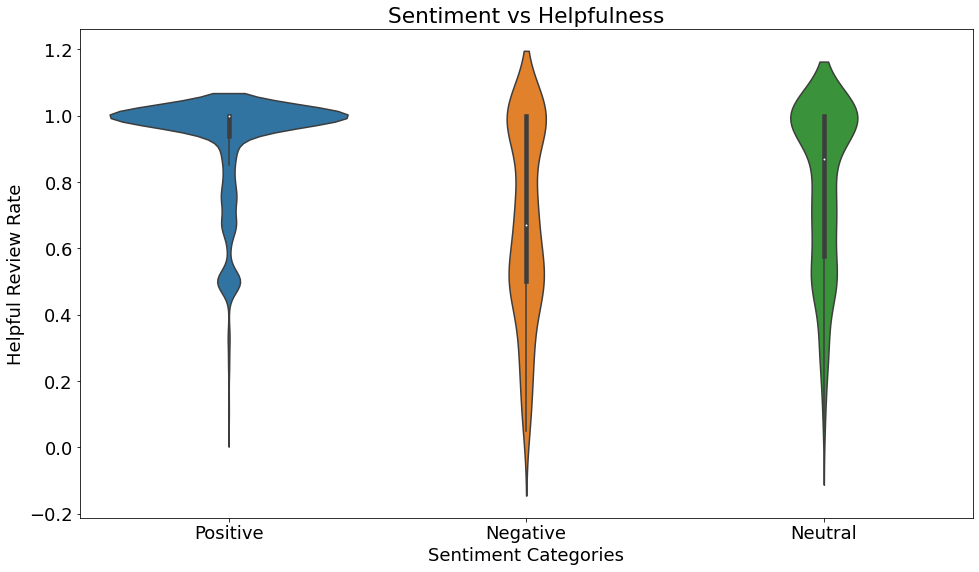

In [ ]:
#plot layout
plt.rcParams.update({'font.size': 18})
rcParams['figure.figsize'] = 16,9

# Creating dataframe and removing 0 helpfulrate records
sentiment_helpful_rate = pd.DataFrame(reviews, columns = ['Sentiment', 'helpful_review'])
sentiment_helpful_rate = sentiment_helpful_rate[sentiment_helpful_rate['helpful_review'] != 0.00] 

#Plotting phase
sns.violinplot( x = sentiment_helpful_rate["Sentiment"], y=sentiment_helpful_rate["helpful_review"])
plt.title('Sentiment vs Helpfulness')
plt.xlabel('Sentiment Categories')
plt.ylabel('Helpful Review Rate')
plt.show()

From the plot we can declare that more number of positive reviews are having high helpful rate. We got deceived by the mean value, it's better to look at a plot rather than taking some measures of central tendency under such situation. This verifies our first point of prior analysis.

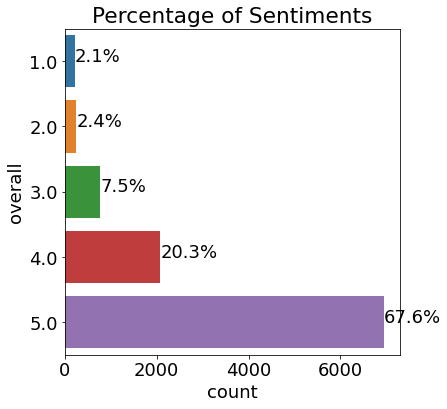

In [ ]:
plt.figure(figsize=(6,6))
plt.title('Percentage of Sentiments')
ax = sns.countplot(y = 'overall', data = reviews)
total = len(reviews)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

Sentiment and Year Graphs

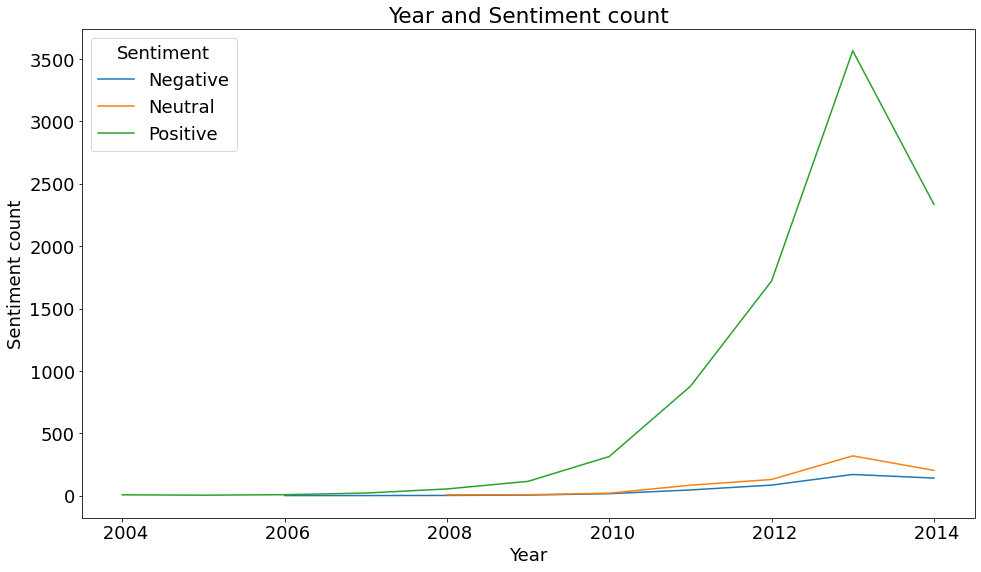

In [ ]:
reviews.groupby(['year','Sentiment'])['Sentiment'].count().unstack().plot(legend=True)
plt.title('Year and Sentiment count')
plt.xlabel('Year')
plt.ylabel('Sentiment count')
plt.show()

Insights: From the plot we can clearly see the rise in positive reviews from 2010. Reaching its peak around 2013 and there is a dip in 2014, All the review rates were dropped at this time. Negative and neutral reviews are very low as compared to the positive reviews but have higher values as compared to other years.

**Filtering Data Removing the Null Values in the following Columns below** 

In [ ]:
#Filtering data
positive_review = reviews[reviews["Sentiment"]=='Positive'].dropna()
neutral_review = reviews[reviews["Sentiment"]=='Neutral'].dropna()
negative_review = reviews[reviews["Sentiment"]=='Negative'].dropna()

## custom function for ngram generation ##
def generate_ngrams(text, n_gram = 1):
    token = [token for token in text.lower().split(" ") if token != "" if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

In [ ]:
negative_review

reviewerID        asin  overall  \
15     A2PD27UKAD3Q00  B00005ML71      2.0   
50     A12ABV9NU02O29  B000068NW5      2.0   
52     A1L7M2JXN4EZCR  B000068NW5      1.0   
89     A3UD50M7M72150  B000068NW5      1.0   
98     A1W3CEEQBJ4GTN  B000068NZC      2.0   
...               ...         ...      ...   
10171  A2Y2U697SS98E1  B00F2PKRJW      1.0   
10178   A768OB1LNE356  B00FXKIG5I      2.0   
10187  A3AOPVQ7EZHTWA  B00GTSM8FW      2.0   
10189  A1SD1C8XK3Z3V1  B00GTSM8FW      2.0   
10247  A3VDSGNIS92OVZ  B00J4TBMVO      2.0   

                                                 reviews Sentiment   year  \
15     bought use keyboard wasnt really aware options...  Negative   2013   
50     didnt expect cable thin easily thickness guita...  Negative   2011   
52     hums crackles think im problems equipment soon...  Negative   2014   
89     im procheapo hated thing theyre noisy cables f...  Negative   2014   
98     bought canon vixia hf video camera shotgun mic...  Negative   2013   
...                                                  ...       ...    ...   
10171  really wanted like but theyre frickin lintcatc...  Negative   2014   
10178  larger ones sometimes neck snap thought might ...  Negative   2014   
10187  tension screw adjustment remains best capo ive...  Negative   2014   
10189  fan planet waves ns capos but new one not well...  Negative   2014   
10247  looking forward trying ive loved companys prod...  Negative   2014   

      month day  helpful_review  
15       08  17             0.0  
50       07   6             1.0  
52       02   9             0.0  
89       03  14             0.0  
98       09  16             0.0  
...     ...  ..             ...  
10171    06  12             0.0  
10178    03  22             0.5  
10187    04  24             0.0  
10189    06   2             1.0  
10247    06  24             1.0  

[467 rows x 9 columns]

In [ ]:
positive_review

reviewerID        asin  overall  \
0      A2IBPI20UZIR0U  1384719342      5.0   
1      A14VAT5EAX3D9S  1384719342      5.0   
2      A195EZSQDW3E21  1384719342      5.0   
3      A2C00NNG1ZQQG2  1384719342      5.0   
4       A94QU4C90B1AX  1384719342      5.0   
...               ...         ...      ...   
10256  A14B2YH83ZXMPP  B00JBIVXGC      5.0   
10257   A1RPTVW5VEOSI  B00JBIVXGC      5.0   
10258   AWCJ12KBO5VII  B00JBIVXGC      4.0   
10259  A2Z7S8B5U4PAKJ  B00JBIVXGC      4.0   
10260  A2WA8TDCTGUADI  B00JBIVXGC      4.0   

                                                 reviews Sentiment   year  \
0      not much write but exactly supposed filters po...  Positive   2014   
1      product exactly quite affordablei not realized...  Positive   2013   
2      primary job device block breath would otherwis...  Positive   2013   
3      nice windscreen protects mxl mic prevents pops...  Positive   2014   
4      pop filter great looks performs like studio fi...  Positive   2014   
...                                                  ...       ...    ...   
10256                 great expected thank allfive stars  Positive   2014   
10257  ive thinking trying nanoweb strings but bit pu...  Positive   2014   
10258  tried coated strings past including elixirs ne...  Positive   2014   
10259  well made elixir developed taylor guitars stri...  Positive   2014   
10260  strings really quite good but wouldnt call per...  Positive   2014   

      month day  helpful_review  
0        02  28            0.00  
1        03  16            0.93  
2        08  28            1.00  
3        02  14            0.00  
4        02  21            0.00  
...     ...  ..             ...  
10256    07  20            0.00  
10257    07   2            0.00  
10258    07  22            0.00  
10259    07   1            0.00  
10260    07  16            0.00  

[9022 rows x 9 columns]

In [ ]:
# custom function for horizontal bar chart ##
def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y =df["word"].values[::-1],
        x = df["wordcount"].values[::-1],
        showlegend = False,
        orientation = 'h',
        marker = dict(
            color = color,
        ),
    )
    return trace

In [ ]:
## Get the bar chart from positive reviews ##
freq_dict = defaultdict(int)
for sent in positive_review["reviews"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(20), 'orange')

In [ ]:
## Get the bar chart from neutral reviews ##
freq_dict = defaultdict(int)
for sent in neutral_review["reviews"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(20), 'blue')

In [ ]:
## Get the bar chart from negative reviews ##
freq_dict = defaultdict(int)
for sent in negative_review["reviews"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace2 = horizontal_bar_chart(fd_sorted.head(20), 'green')

In [ ]:
# Creating two subplots
fig = tools.make_subplots(rows=3, cols=1, vertical_spacing = 0.04,
                          subplot_titles=["Frequent words of positive reviews", "Frequent words of neutral reviews",
                                          "Frequent words of negative reviews"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 2, 1)
fig.append_trace(trace2, 3, 1)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
iplot(fig, filename='word-plots')


 

*    With ngram, not much information is gathered for sentiments based on one word
## **Bigram Analysis**
*   Most frequent 2 words in reviews based on sentiments









In [ ]:
## Get the bar chart from positive reviews ##

freq_dict = defaultdict(int)
for sent in positive_review["reviews"]:
    for word in generate_ngrams(sent, 2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(20), 'red')


## Get the bar chart from neutral reviews ##

freq_dict = defaultdict(int)
for sent in neutral_review["reviews"]:
    for word in generate_ngrams(sent, 2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(20), 'orange')


## Get the bar chart from negative reviews ##

freq_dict = defaultdict(int)
for sent in negative_review["reviews"]:
    for word in generate_ngrams(sent, 2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace2 = horizontal_bar_chart(fd_sorted.head(20), 'brown')

In [ ]:
# Creating two subplots
fig = tools.make_subplots(rows=3, cols=1, vertical_spacing = 0.04,
                          subplot_titles=["Frequent words of positive reviews", "Frequent words of neutral reviews",
                                          "Frequent words of negative reviews"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 2, 1)
fig.append_trace(trace2, 3, 1)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
iplot(fig, filename='word-plots')

***In bigram (n = 2) analysis, where there are two words, somehow justify the sentiment categories.***
Trying (n=3) trigram analysis

In [ ]:

## Get the bar chart from positive reviews ##
freq_dict = defaultdict(int)
for sent in positive_review["reviews"]:
    for word in generate_ngrams(sent, 3):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(20), 'purple')


## Get the bar chart from neutral reviews ##
freq_dict = defaultdict(int)
for sent in neutral_review["reviews"]:
    for word in generate_ngrams(sent, 3):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(20), 'green')


## Get the bar chart from negative reviews ##
freq_dict = defaultdict(int)
for sent in negative_review["reviews"]:
    for word in generate_ngrams(sent, 3):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace2 = horizontal_bar_chart(fd_sorted.head(20), 'cyan')

In [ ]:
# Creating two subplots
fig = tools.make_subplots(rows=3, cols=1, vertical_spacing = 0.04,
                          subplot_titles=["Frequent words of positive reviews", "Frequent words of neutral reviews",
                                          "Frequent words of negative reviews"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 2, 1)
fig.append_trace(trace2, 3, 1)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
iplot(fig, filename='word-plots')

**WordCloud for Postive, Neutral, Negative Sentiments**

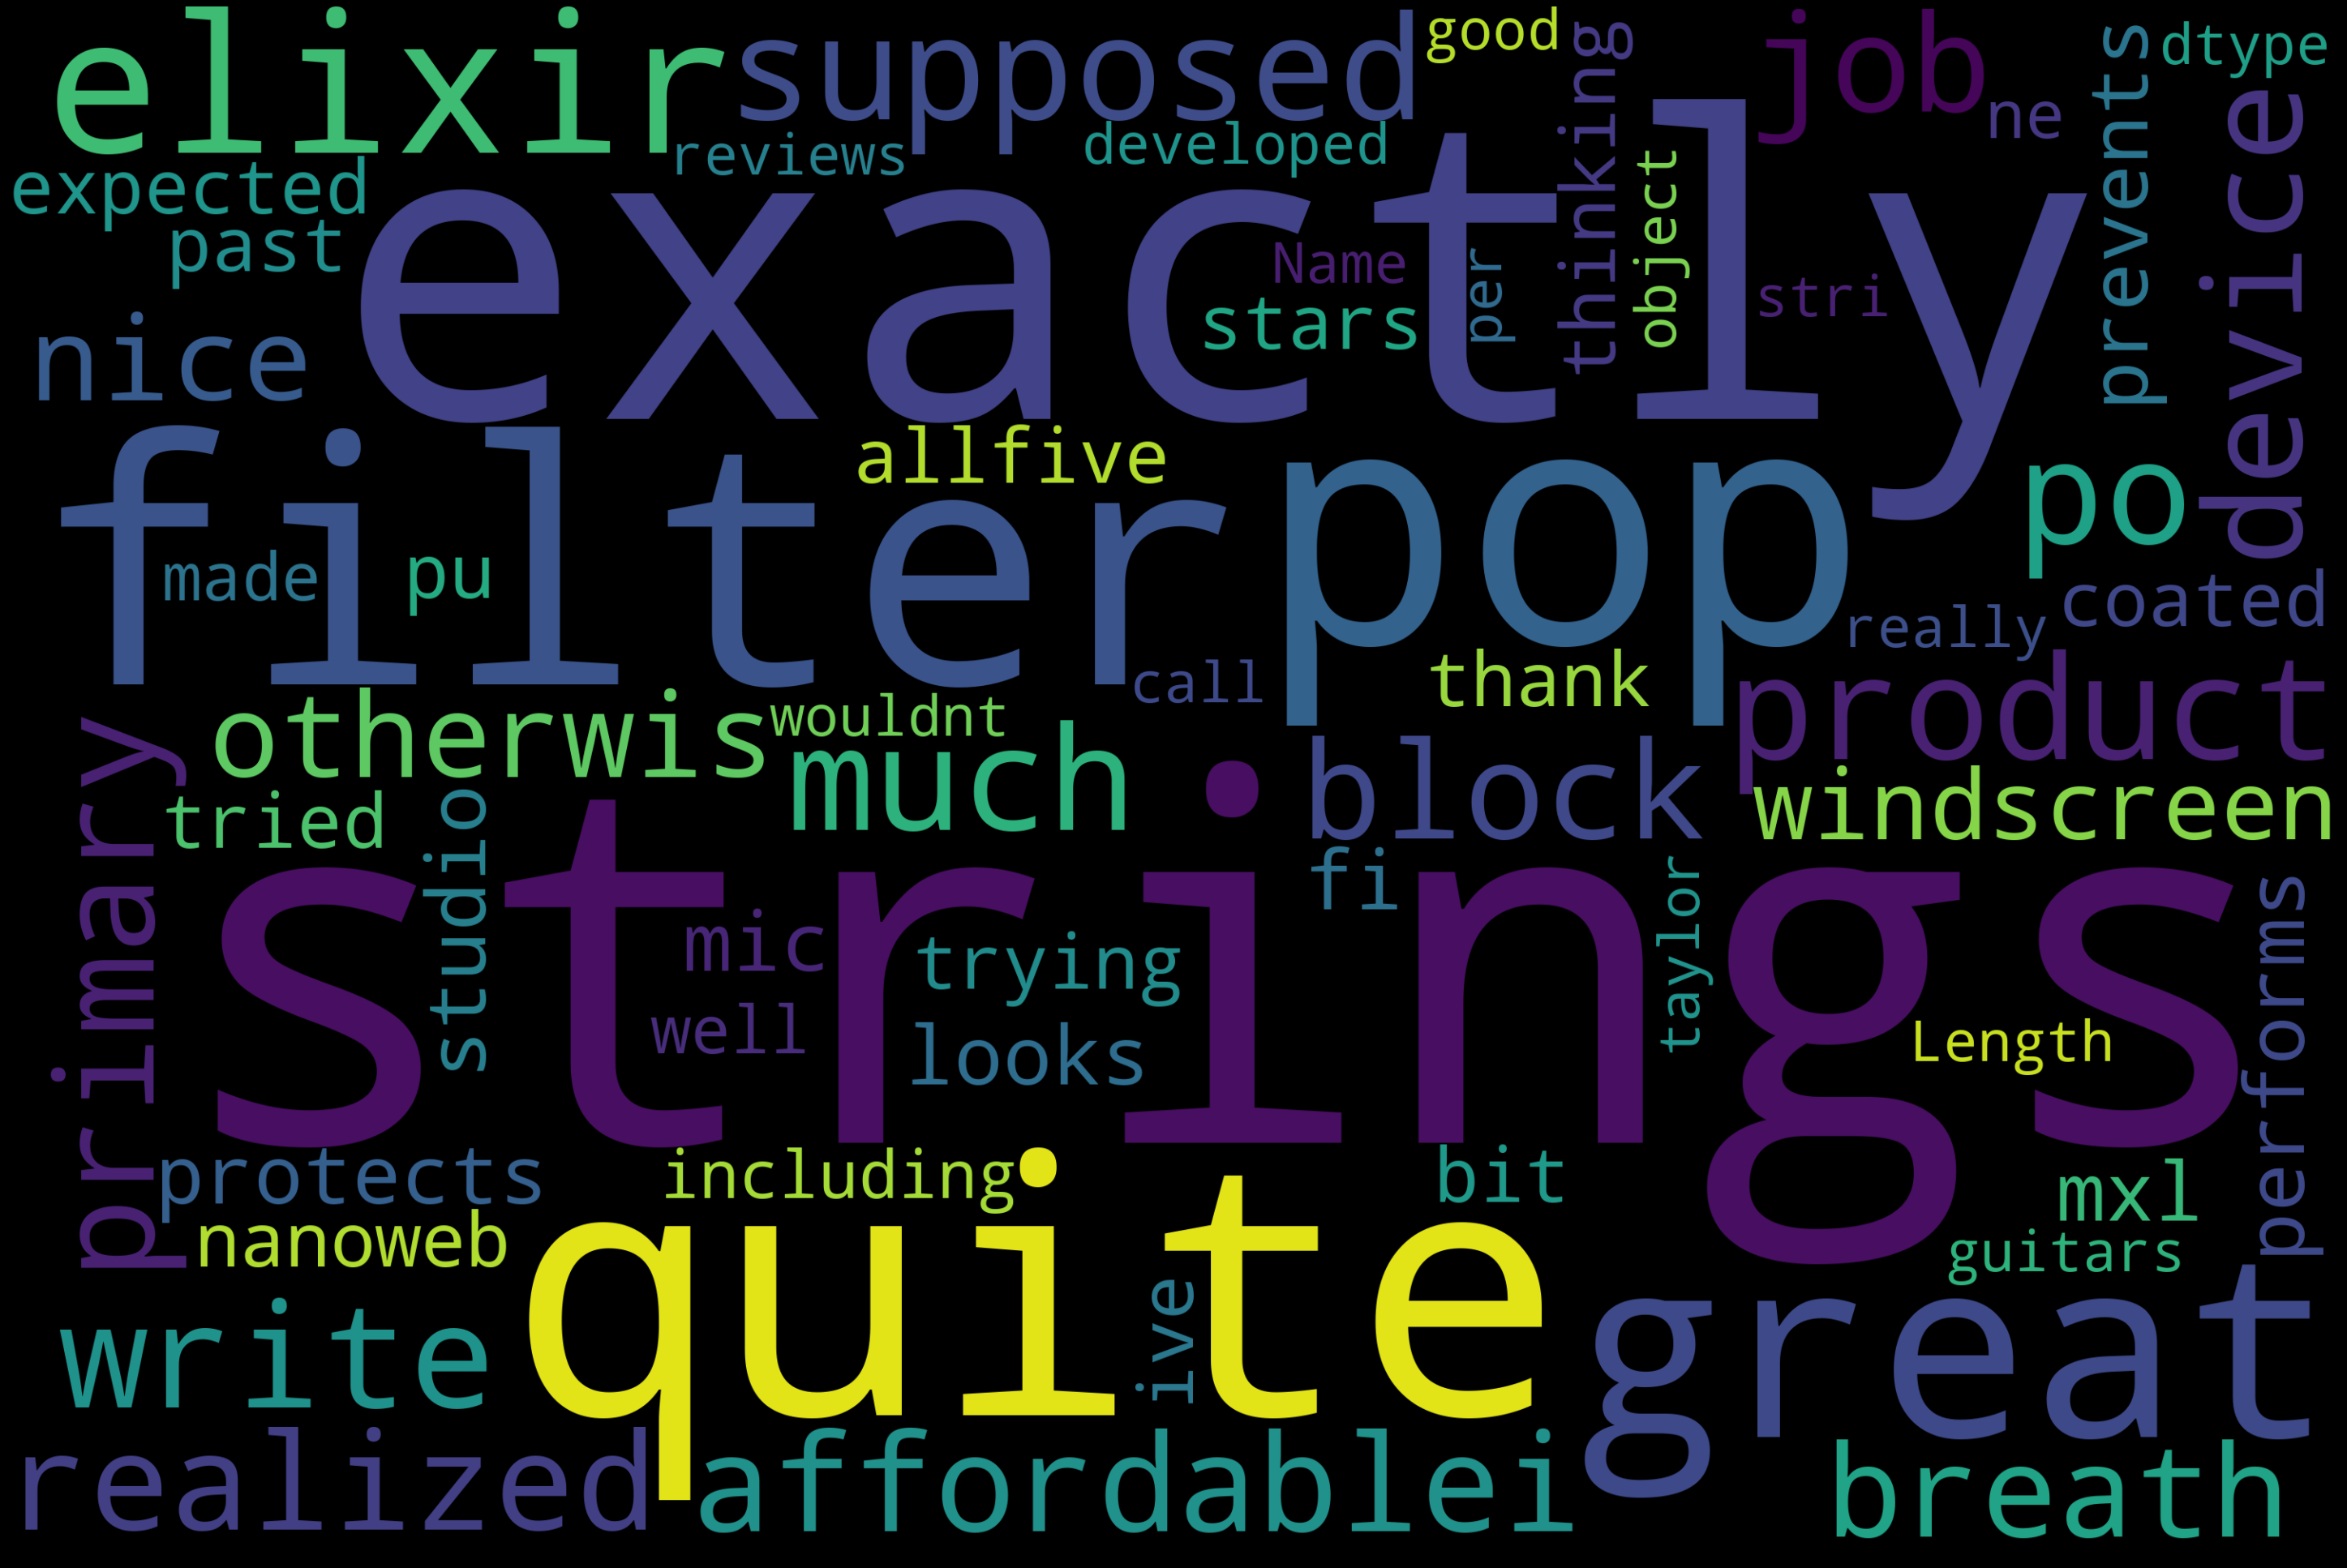

In [ ]:
text = positive_review["reviews"]
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

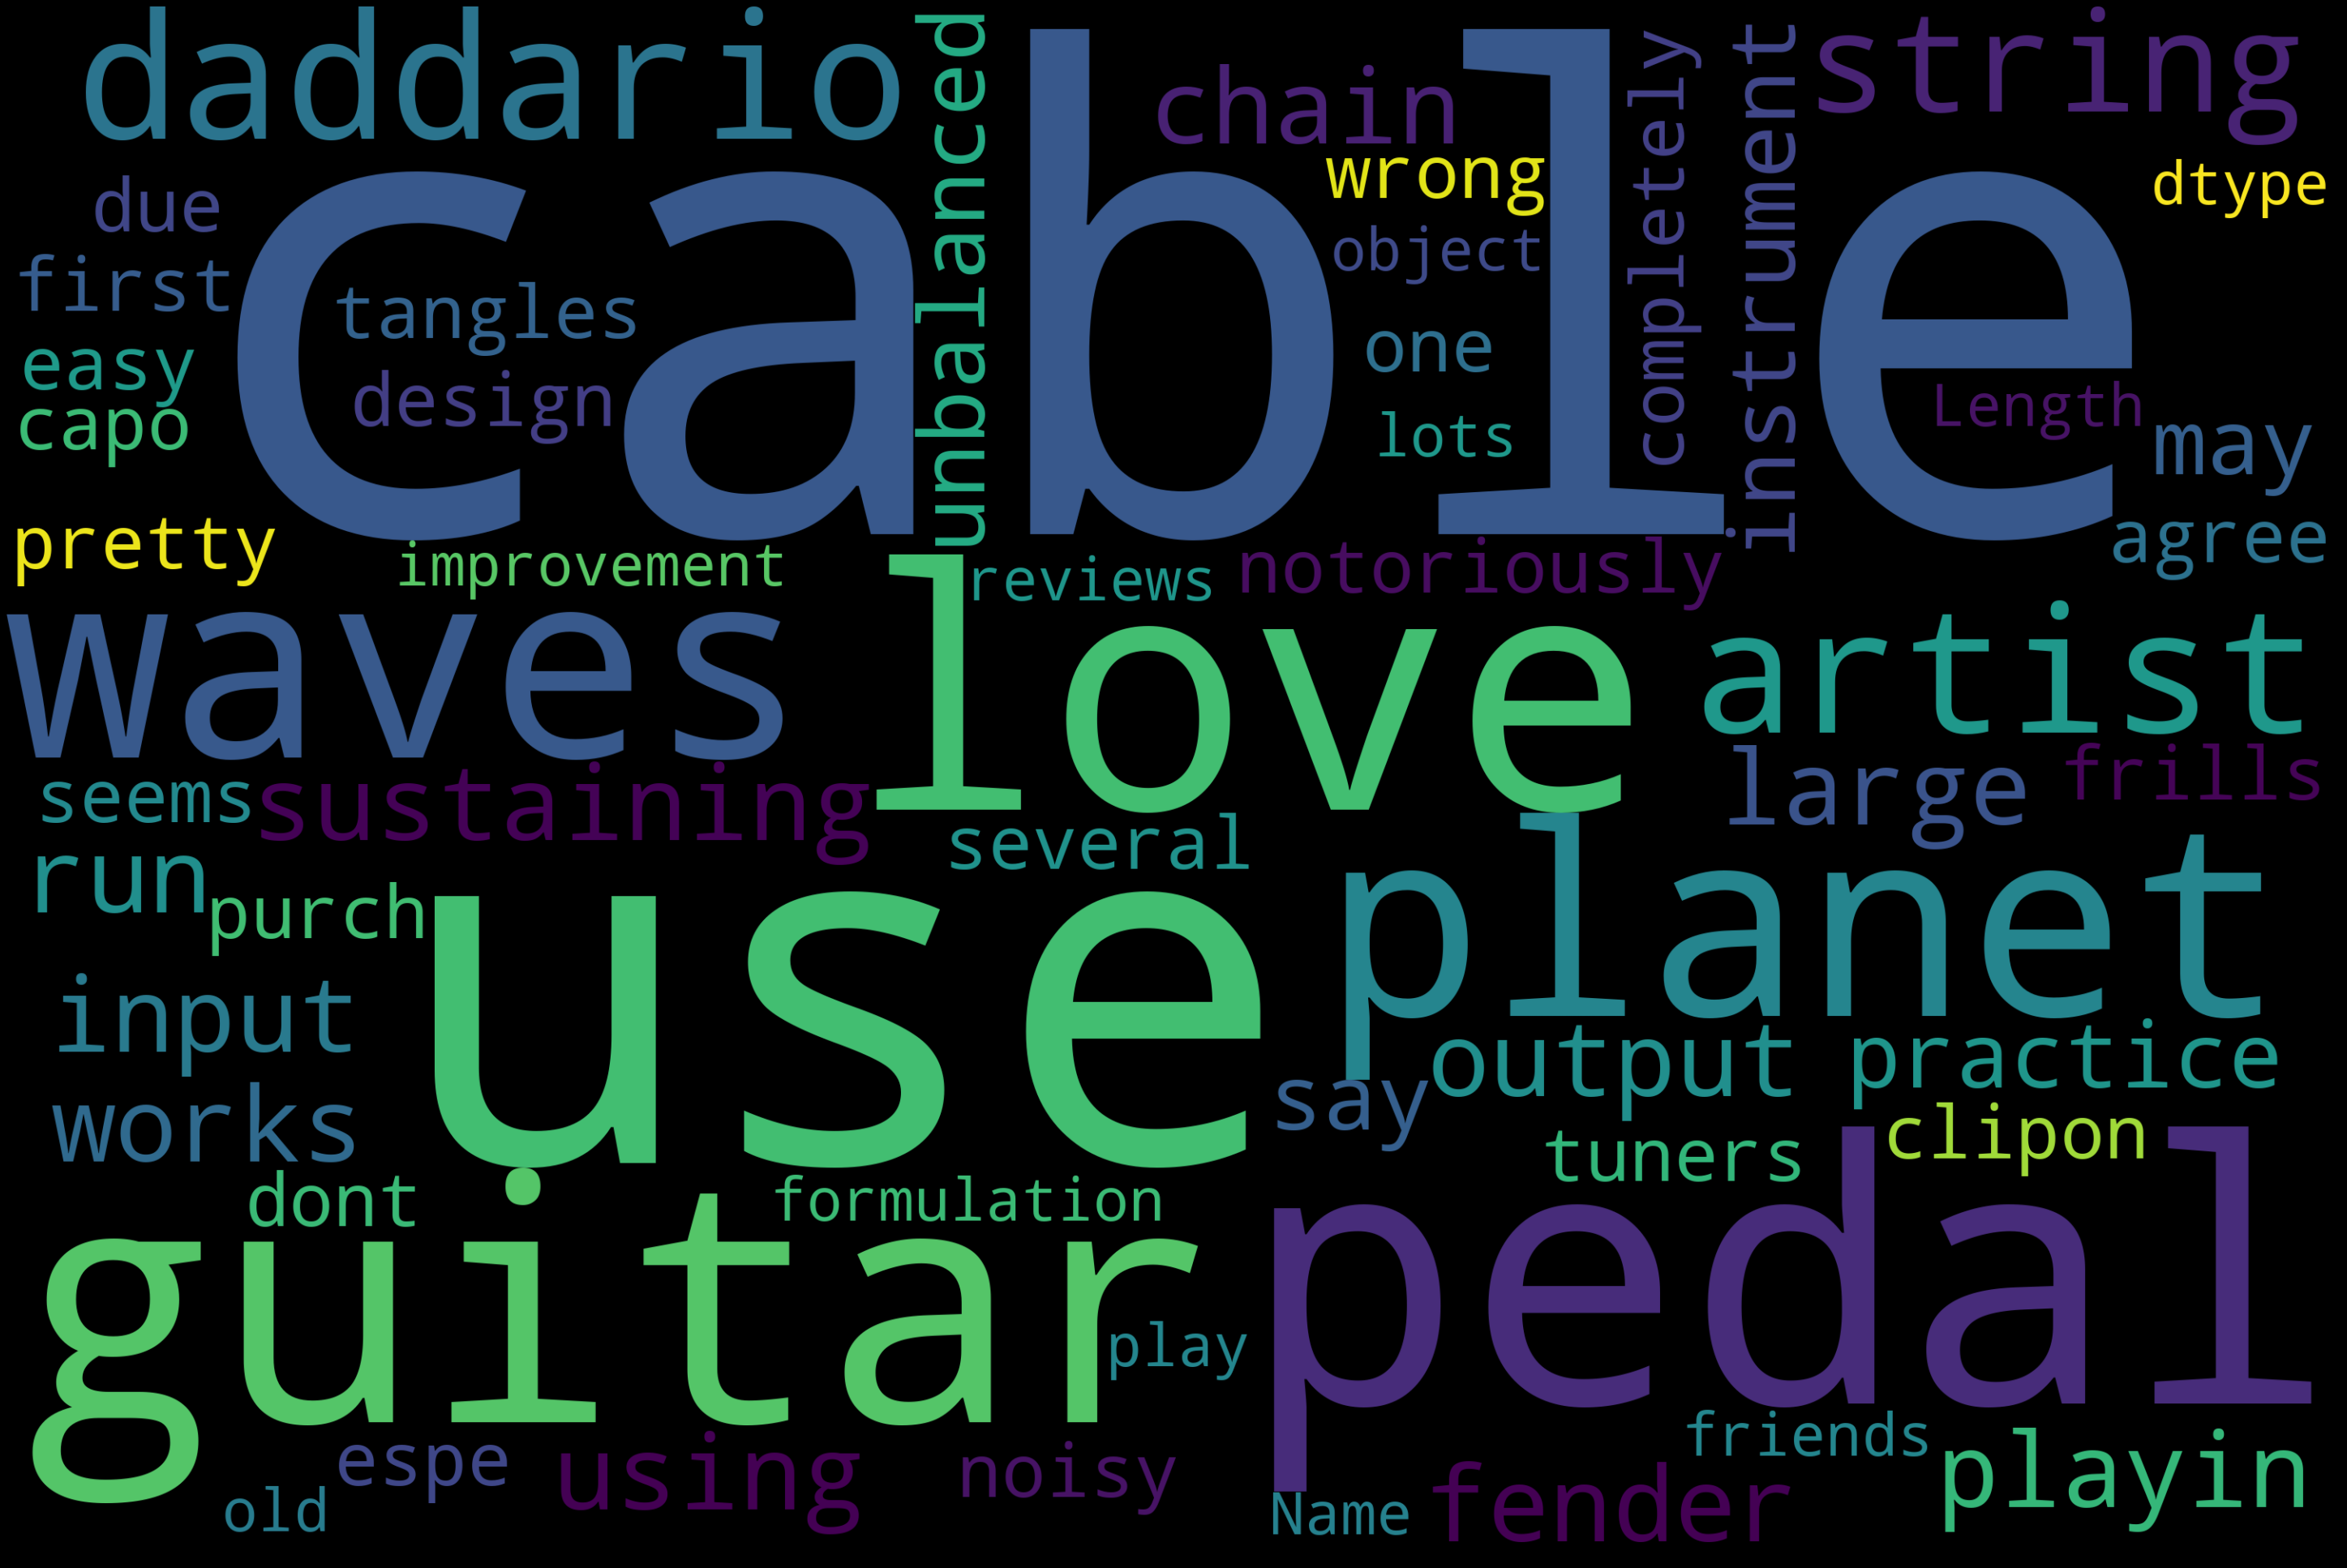

In [ ]:
text = neutral_review["reviews"]
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

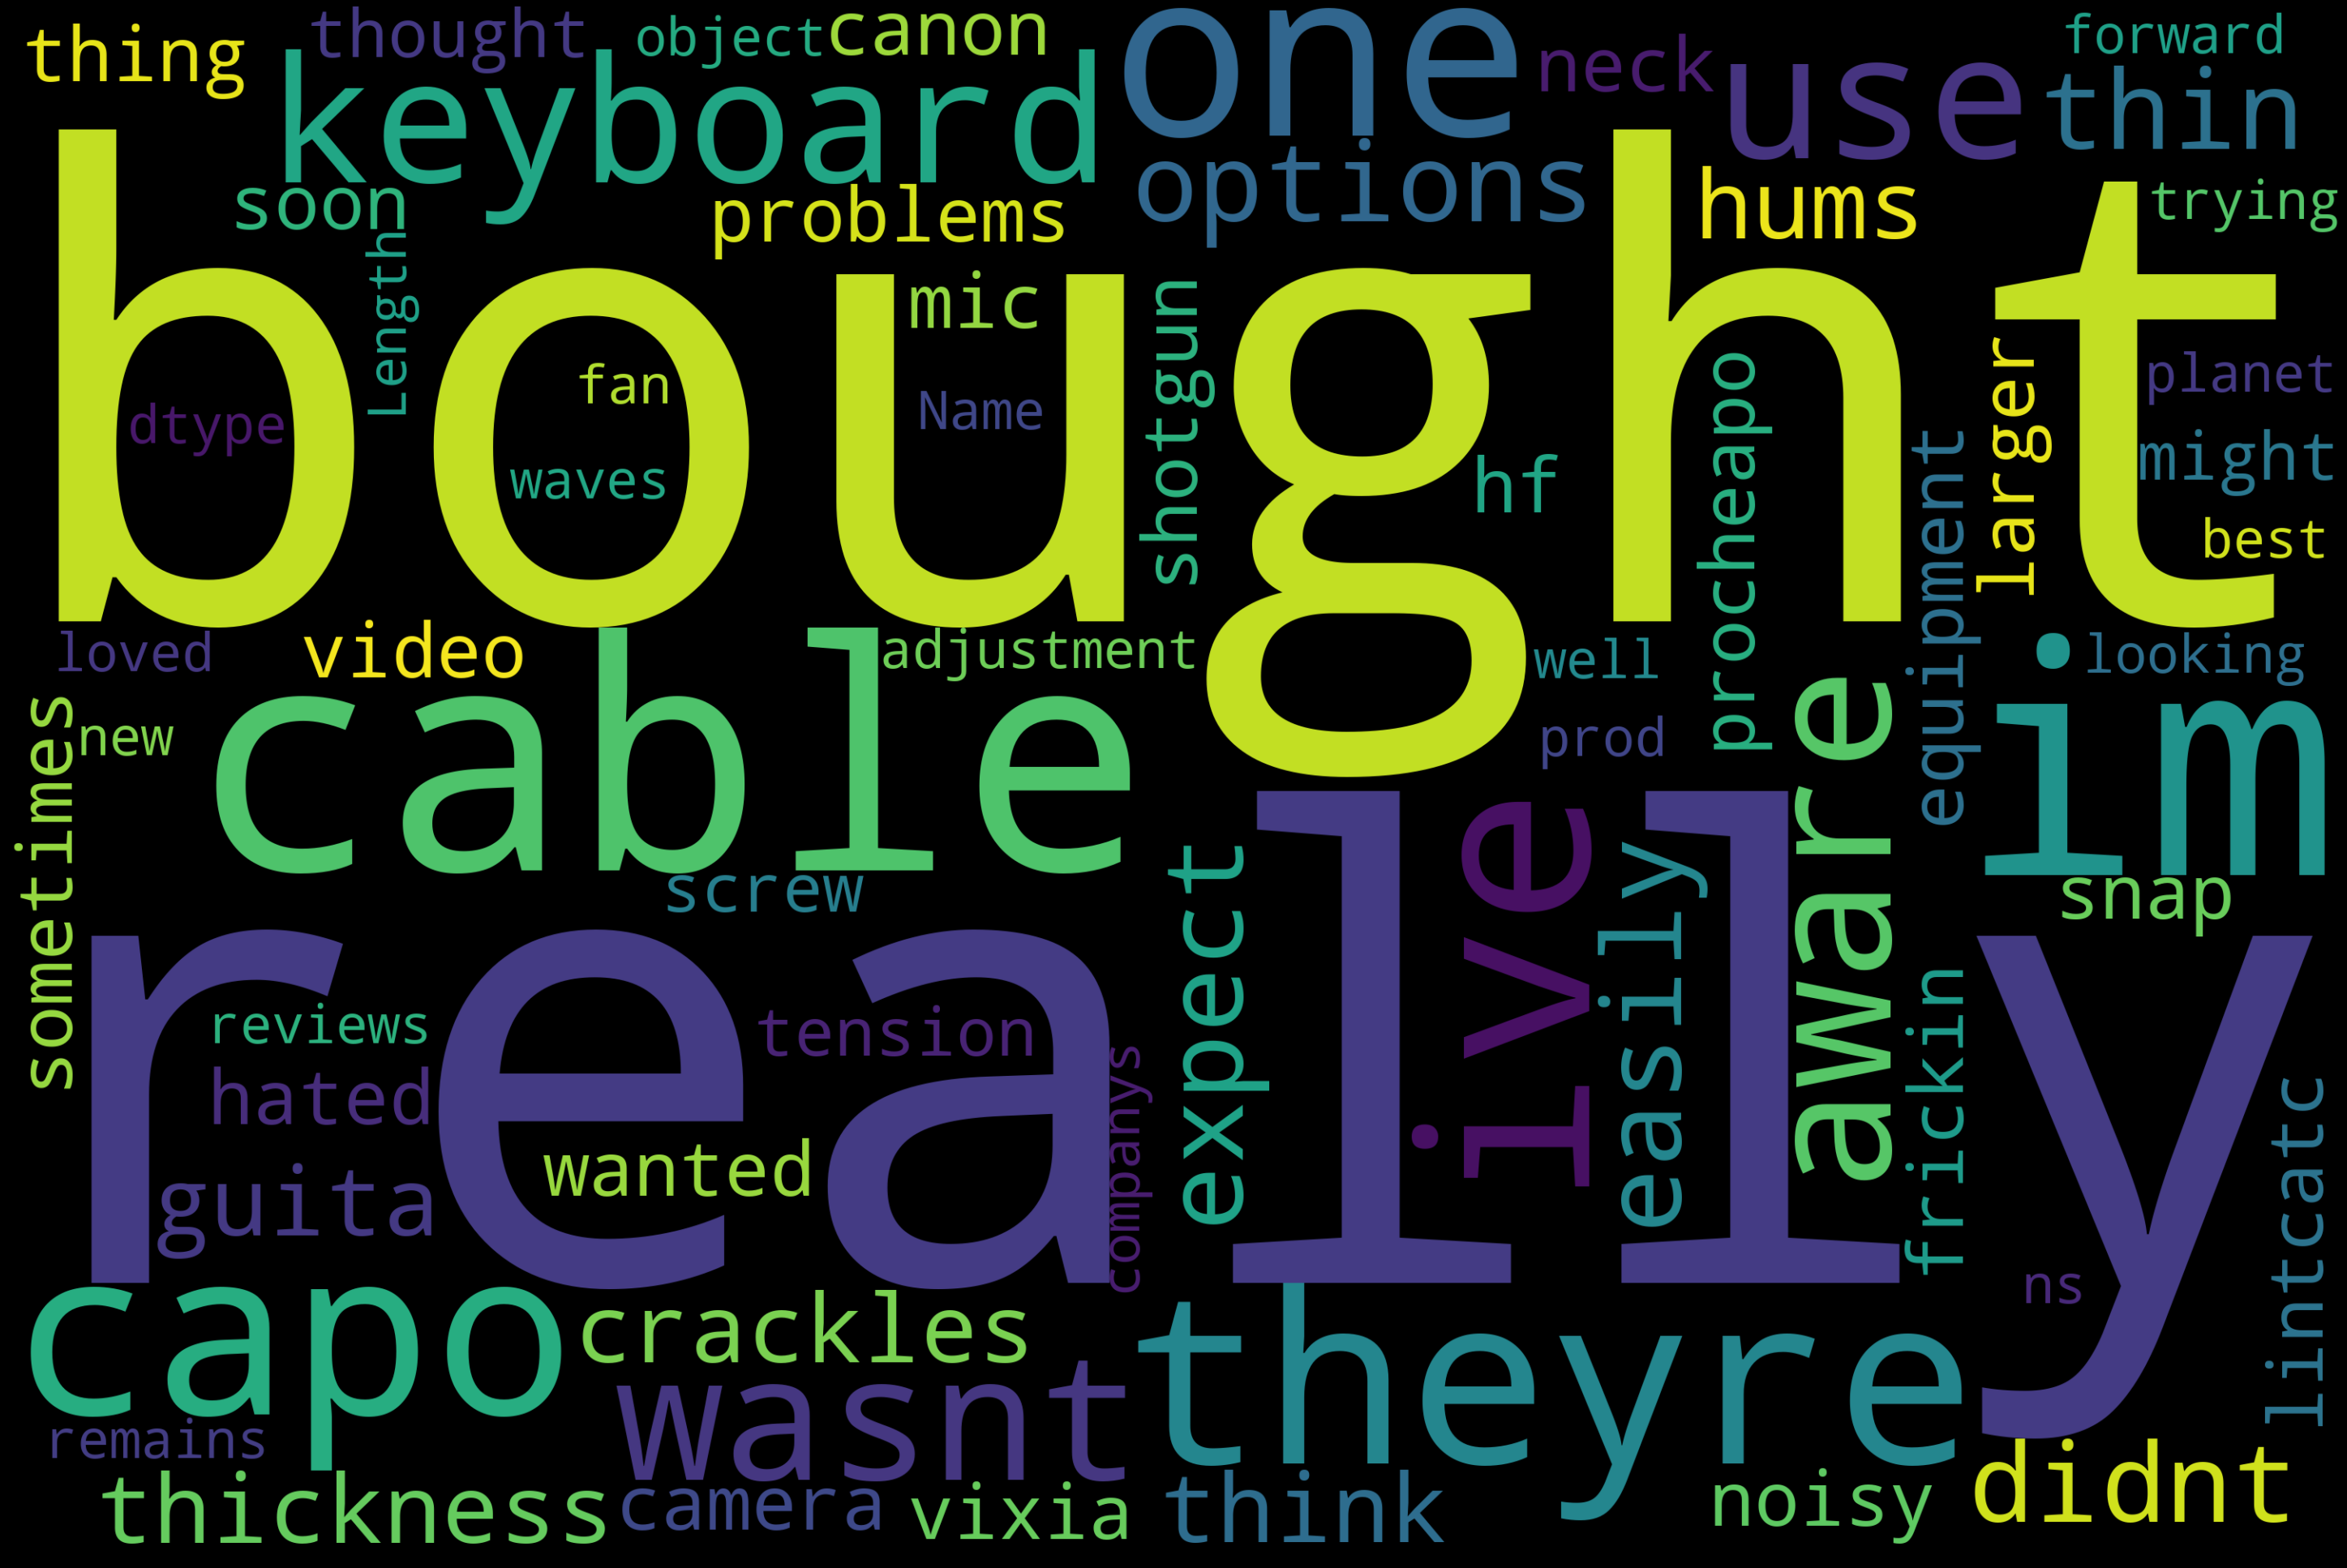

In [ ]:
text = negative_review["reviews"]
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

**Extracting Features from Reviews**

Encoding target variable-sentiment

Before building the model for doing sentiment analysis, it is required to convert the review texts into vector formation as computer cannot understand words and their sentiment. After that TF-TDF method to convert the texts.

In [ ]:
# calling the label encoder function
le = preprocessing.LabelEncoder() 
  
# Encode labels in column 'sentiment'. 
reviews['Sentiment']= le.fit_transform(reviews['Sentiment']) 

reviews['Sentiment'].unique() 

array([2, 1, 0])

In [ ]:
reviews['Sentiment'].value_counts()

2    9022
1     772
0     467
Name: Sentiment, dtype: int64

In [ ]:
#Extracting 'reviews' for processing
review_features = reviews.copy()
review_features = review_features[['reviews']].reset_index(drop=True)
review_features.head()

reviews
0  not much write but exactly supposed filters po...
1  product exactly quite affordablei not realized...
2  primary job device block breath would otherwis...
3  nice windscreen protects mxl mic prevents pops...
4  pop filter great looks performs like studio fi...

**TFIDF(Term Frequency — Inverse Document Frequency)**

TF-IDF stands for “Term Frequency — Inverse Document Frequency”. This is a technique to quantify a word in documents, we generally compute a weight to each word which signifies the importance of the word in the document and corpus. This method is a widely used technique in Information Retrieval and Text Mining.

Here we are splitting as bigram (two words) and consider their combined weight.Also we are taking only the top 5000 words from the reviews.

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_features = 5000, ngram_range = (2,2))
# TF-IDF feature matrix
X = tfidf_vectorizer.fit_transform(review_features['reviews'])
X.shape

(10261, 5000)

In [ ]:
#Getting the target variable(encoded)
y = reviews['Sentiment']
y.shape

(10261,)

***Synthetic Minority Oversampling Technique (SMOTE)***

In our dataset, there are a lot of positive sentiments compared to negative and neutral, which is making our dataset imbalanced. To overcome this issue of imbalance dataset, SMOTE technique is used to balance out. It's aim is to balance class distribution by randomly increasing minority class examples by replicating them.

In [ ]:
print(f'Original dataset shape before SMOTE : {Counter(y)}')

smote = SMOTE(random_state = 42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print(f'Resampled dataset shape after applying SMOTE {Counter(y_resampled)}')

Original dataset shape before SMOTE : Counter({2: 9022, 1: 772, 0: 467})
Resampled dataset shape after applying SMOTE Counter({2: 9022, 1: 9022, 0: 9022})


**Model Building**

Train - Test Split 


In [ ]:
## Splitting the dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.2, random_state=0)

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title = 'Confusion matrix',
                          cmap = plt.cm.Purples):
    """
    This function prints and plots the confusion matrix.
    """
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i in range (cm.shape[0]):
        for j in range (cm.shape[1]):
            plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
#creating the objects
logreg = LogisticRegression(random_state=0)
dt = DecisionTreeClassifier()
knn = KNeighborsClassifier()
svc = SVC()
nb = BernoulliNB()
rf = RandomForestClassifier()
cv_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2:'KNN', 3:'SVC', 4:'Naive Bayes', 5: 'Random Forest'}
cv_models = [logreg, dt, knn, svc, nb, rf]


for i,model in enumerate(cv_models):
    print("{} Test Accuracy: {}".format(cv_dict[i],cross_val_score(model, X, y, cv = 10, scoring = 'accuracy').mean()))

Logistic Regression Test Accuracy: 0.8810059200798708
Decision Tree Test Accuracy: 0.8130795993554155
KNN Test Accuracy: 0.8689214787482609
SVC Test Accuracy: 0.8795439317757772
Naive Bayes Test Accuracy: 0.8038184420263036
Random Forest Test Accuracy: 0.8757434265095825


##*Logistics Regression Classification Metrics*
---



In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.89


Classification Metrics

As our LR accuracy turns out to be 89%, for classification problems, confusion matrix and f1 score is required than to have accuracy alone

Confusion matrix, without normalization


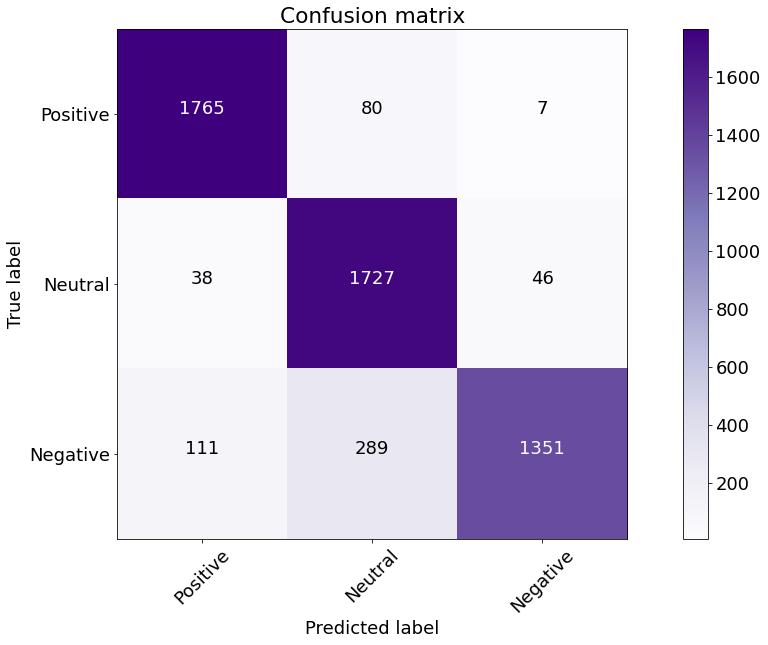

In [ ]:
cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes = ['Positive','Neutral','Negative'])

The diagonal elements with dark highlighted colours, they are correctly predicted records and rest are incorrectly classified by the algorithm.

In [ ]:
print("Classification Report:\n",classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.95      0.94      1852
           1       0.82      0.95      0.88      1811
           2       0.96      0.77      0.86      1751

    accuracy                           0.89      5414
   macro avg       0.90      0.89      0.89      5414
weighted avg       0.90      0.89      0.89      5414



##*Decision Tree Classification Metrics*
---



In [ ]:
DecTree_model = DecisionTreeClassifier().fit(X_train,y_train)
print("The mean Accuracy of the model is: ", DecTree_model.score(X_test,y_test) )

The mean Accuracy of the model is:  0.8849279645363871


In [ ]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)
y_DecTree_pred = classifier.predict(X_test)
print('Accuracy of Decision Tree classifier on test set: {:.2f}'.format(classifier.score(X_test, y_test)))

Accuracy of Decision Tree classifier on test set: 0.88


**Confusion Matrix, Classification Reports for Descision Tree**

As our **Decision Tree** accuracy turns out to be 88%, for classification problems, confusion matrix and f1 score is required than to have accuracy alone

Confusion matrix, without normalization


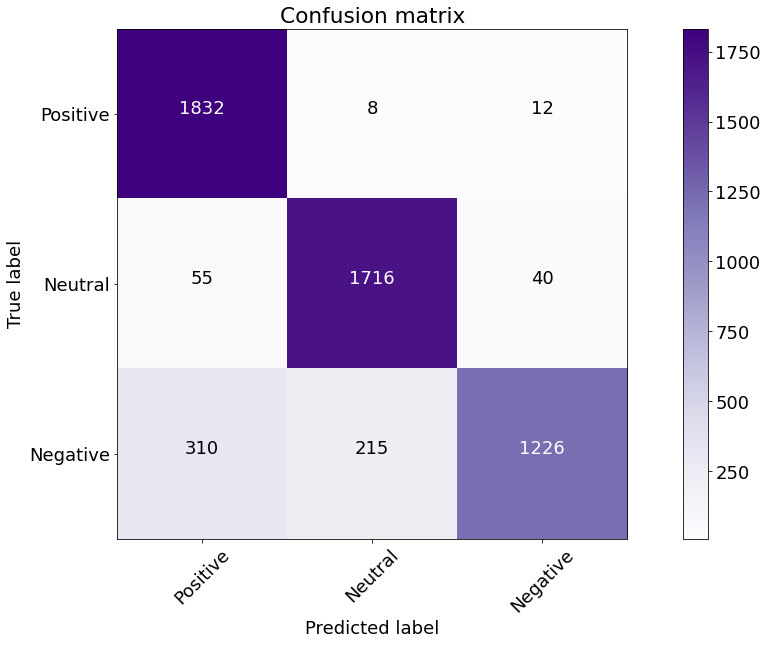

In [ ]:
cm_DecTree = metrics.confusion_matrix(y_test, y_DecTree_pred)
plot_confusion_matrix(cm_DecTree, classes = ['Positive','Neutral','Negative'])

In [ ]:
print("Classification Report:\n",classification_report(y_test, y_DecTree_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.99      0.90      1852
           1       0.88      0.95      0.92      1811
           2       0.96      0.70      0.81      1751

    accuracy                           0.88      5414
   macro avg       0.89      0.88      0.88      5414
weighted avg       0.89      0.88      0.88      5414



##*KNN Classification Metrics*
---



In [ ]:
kNN_model = KNeighborsClassifier().fit(X_train,y_train)
print("The mean Accuracy of the KNN model is: ", kNN_model.score(X_test,y_test))

The mean Accuracy of the KNN model is:  0.6477650535648319


In [ ]:
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)
y_KNN_pred = classifier.predict(X_test)
print('Accuracy of KNN classifier on test set: {:.2f}'.format(classifier.score(X_test, y_test)))

Accuracy of KNN classifier on test set: 0.65


**Confusion Matrix, Classification Reports for K - Nearest Neighbors (k-NN)**

As our **K - Nearest Neighbors (k-NN)** accuracy turns out to be 65%, for classification problems, confusion matrix and f1 score is required therefore

Confusion matrix, without normalization


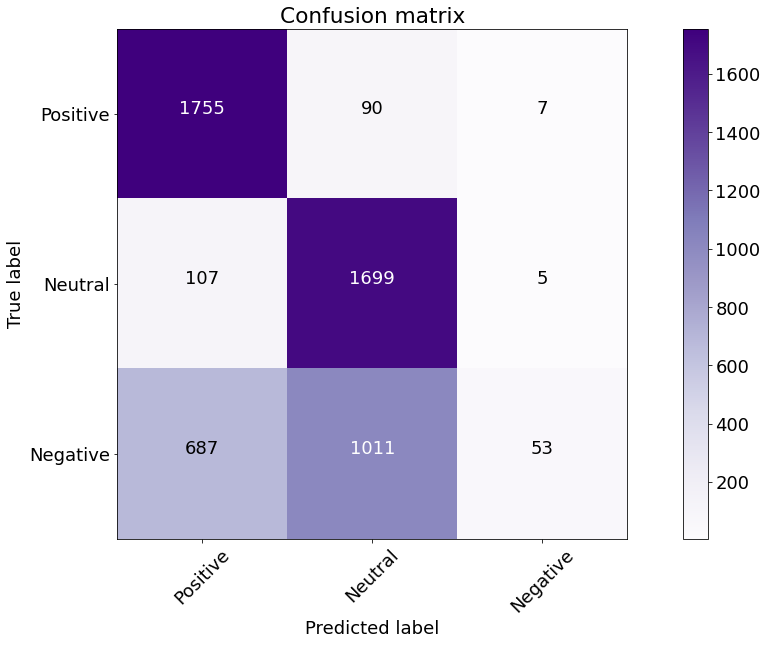

In [ ]:
cm_knn = metrics.confusion_matrix(y_test, y_KNN_pred)
plot_confusion_matrix(cm_knn, classes = ['Positive','Neutral','Negative'])

In [ ]:
print("Classification Report for k-NN :\n",classification_report(y_test, y_KNN_pred))

Classification Report for k-NN :
               precision    recall  f1-score   support

           0       0.69      0.95      0.80      1852
           1       0.61      0.94      0.74      1811
           2       0.82      0.03      0.06      1751

    accuracy                           0.65      5414
   macro avg       0.70      0.64      0.53      5414
weighted avg       0.70      0.65      0.54      5414



##*Support Vector Classification (SVC) Metrics*
---



In [ ]:
SVC_model = SVC().fit(X_train,y_train)
print("The mean Accuracy of the model is: ", SVC_model.score(X_test,y_test))

The mean Accuracy of the model is:  0.98134466198744


In [ ]:
classifier = SVC()
classifier.fit(X_train, y_train)
y_SVC_pred = classifier.predict(X_test)
print('Accuracy of SVC on test set : {:.2f}'.format(classifier.score(X_test, y_test)))

Accuracy of SVC on test set : 0.98


Confusion matrix, without normalization


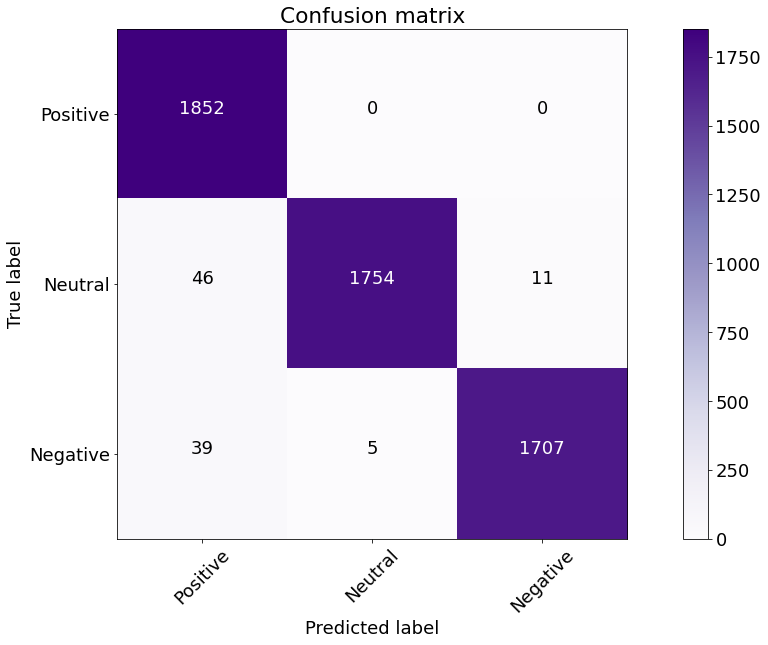

In [ ]:
cm_SVC = metrics.confusion_matrix(y_test, y_SVC_pred)
plot_confusion_matrix(cm_SVC, classes = ['Positive','Neutral','Negative'])

In [ ]:
print("Classification Report of SVC :\n",classification_report(y_test, y_SVC_pred))

Classification Report of SVC :
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      1852
           1       1.00      0.97      0.98      1811
           2       0.99      0.97      0.98      1751

    accuracy                           0.98      5414
   macro avg       0.98      0.98      0.98      5414
weighted avg       0.98      0.98      0.98      5414



##*Naïve Bayes (NB)  Metrics*
---



In [ ]:
NB_model = BernoulliNB().fit(X_train,y_train)
print("The mean Accuracy of the model is: ", NB_model.score(X_test,y_test))

The mean Accuracy of the model is:  0.8666420391577392


In [ ]:
classifier = BernoulliNB()
classifier.fit(X_train, y_train)
y_NB_pred = classifier.predict(X_test)
print('Accuracy of Naïve Bayes on test set: {:.2f}'.format(classifier.score(X_test, y_test)))

Accuracy of Naïve Bayes on test set: 0.87


Confusion matrix, without normalization


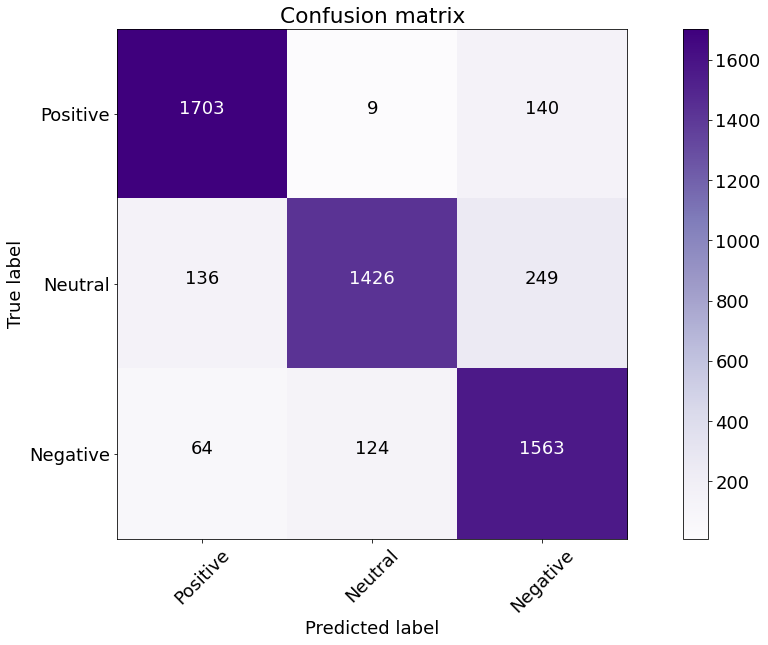

In [ ]:
cm_NB = metrics.confusion_matrix(y_test, y_NB_pred)
plot_confusion_matrix(cm_NB, classes = ['Positive','Neutral','Negative'])

In [ ]:
print("Classification Report for Naïve Bayes :\n",classification_report(y_test, y_NB_pred))

Classification Report for Naïve Bayes :
               precision    recall  f1-score   support

           0       0.89      0.92      0.91      1852
           1       0.91      0.79      0.85      1811
           2       0.80      0.89      0.84      1751

    accuracy                           0.87      5414
   macro avg       0.87      0.87      0.87      5414
weighted avg       0.87      0.87      0.87      5414



##*Random Forest Metrics*
---



In [ ]:
RF_model = RandomForestClassifier().fit(X_train,y_train)
print("The mean Accuracy of the model is: ", RF_model.score(X_test,y_test))

The mean Accuracy of the model is:  0.9222386405615072


In [ ]:
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)
y_RF_pred = classifier.predict(X_test)
print('Accuracy of Decision Tree on test set: {:.2f}'.format(classifier.score(X_test, y_test)))

Accuracy of Decision Tree on test set: 0.92


Confusion matrix, without normalization


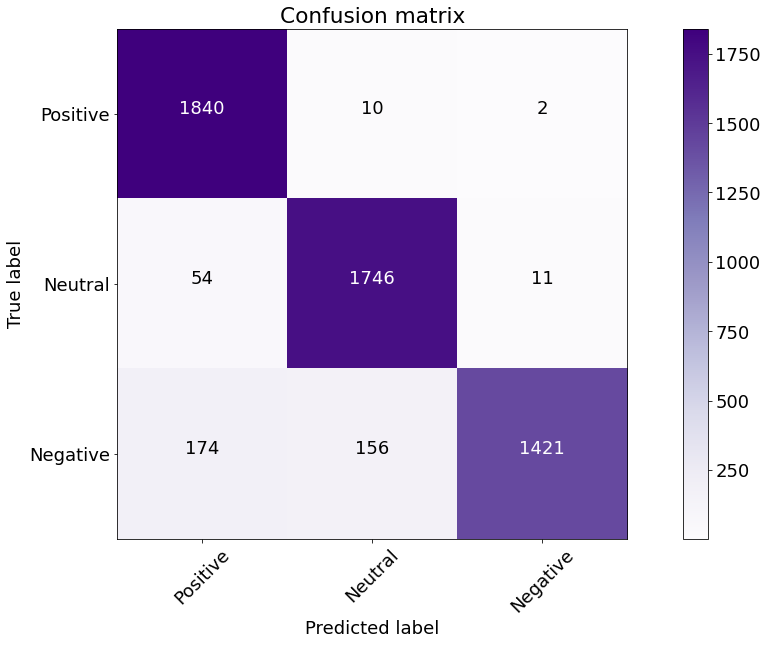

In [ ]:
cm_RF = metrics.confusion_matrix(y_test, y_RF_pred)
plot_confusion_matrix(cm_RF, classes = ['Positive','Neutral','Negative'])

In [ ]:
print("Classification Report for Random Forest :\n",classification_report(y_test, y_RF_pred))

Classification Report for Random Forest :
               precision    recall  f1-score   support

           0       0.89      0.99      0.94      1852
           1       0.91      0.96      0.94      1811
           2       0.99      0.81      0.89      1751

    accuracy                           0.92      5414
   macro avg       0.93      0.92      0.92      5414
weighted avg       0.93      0.92      0.92      5414




#***Extreme Learning Model***
---

Neural networks (NN) and support vector machines (SVM) play key roles in machine learning and data analysis. 

However, it is known that these popular learning techniques face some challenging issues such as: intensive human intervene, slow learning speed, poor learning scalability. The newly proposed Extreme Learning Machine (ELM) can resolve those challenging issues. 

[***SOURCE***](https://www.youtube.com/watch?v=DhCsE9IqZoM)

ELM consists of so many hidden neurons which makes learning fast without taking much time


In [ ]:
from keras.models import Model
from keras.layers import Flatten, Input, Dense, Activation
from keras.losses import BinaryCrossentropy
import numpy as np
import tensorflow as tf

from keras.utils.np_utils import to_categorical

from keras.activations import softmax, relu, sigmoid

from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False).fit((np.array(y)).reshape(-1,1))

In [ ]:
def make_elm_model(sz,h,a,num_cls):
  num_h = h
  I = Input(shape=(sz))
  x = Dense(num_h)(I)
  H = Activation(a)(x)
  x = Dense(num_cls)(H)
  O = Activation("softmax")(x)
  m1 = Model(inputs=I, outputs=H)
  m1.compile(optimizer='rmsprop', loss=BinaryCrossentropy())
  m2 = Model(inputs=I, outputs=O)
  m2.compile(optimizer='rmsprop',loss=BinaryCrossentropy(), metrics=['accuracy'])
  return m1, m2

In [ ]:
# The random weigth function
def random_weight(shape, type):
  if type=="rand":
    return(np.random.rand(*shape))
  if type=="rand_small":
    return(np.random.rand(*shape)*0.001)
  if type=="rand_small_1":
    return((-1+np.random.rand(*shape)*2)*0.001)
  if type=="norm":
    return(np.random.randn(*shape))

In [ ]:
def elm(m1, m2, x_train, y_train, x_test, y_test):
    w_model = m2.get_weights()
    w_model1 = m1.get_weights()
    H = m1.predict(x_train)
    w_model[0] = w_model1[0]
    w_model[1] = w_model1[1]
    w_model[2] = tf.matmul(tf.linalg.pinv(H),y_train)
    m2.set_weights(w_model)
    _, acc = m2.evaluate(x_test, y_test, verbose=0)
    return(m2, acc)

In [ ]:
x_tr = X_train.toarray()
y_tr = np.array(y_train)
x_te = X_test.toarray()
y_te = np.array(y_test)


y_tr = enc.transform(y_tr.reshape(-1,1))
y_te = enc.transform(y_te.reshape(-1,1))

num_cls = (np.unique(np.array(y))).shape[0]
print(num_cls)

3


In [ ]:
sz = (x_tr.shape[1])
hidden_nodes = [1000,2000, 5000, 8000]
act_type = ['elu']
for h in hidden_nodes:
  for a in act_type:
    m1,m2 = make_elm_model(sz,h,a,num_cls)
    m2, test_acc = elm(m1, m2, x_tr, y_tr, x_te, y_te)
    print("{}\t{:15}\t{:.2f}".format(h, a, test_acc*100))

1000	elu            	72.76
2000	elu            	83.01
5000	elu            	89.45
8000	elu            	89.14


Confusion matrix, without normalization


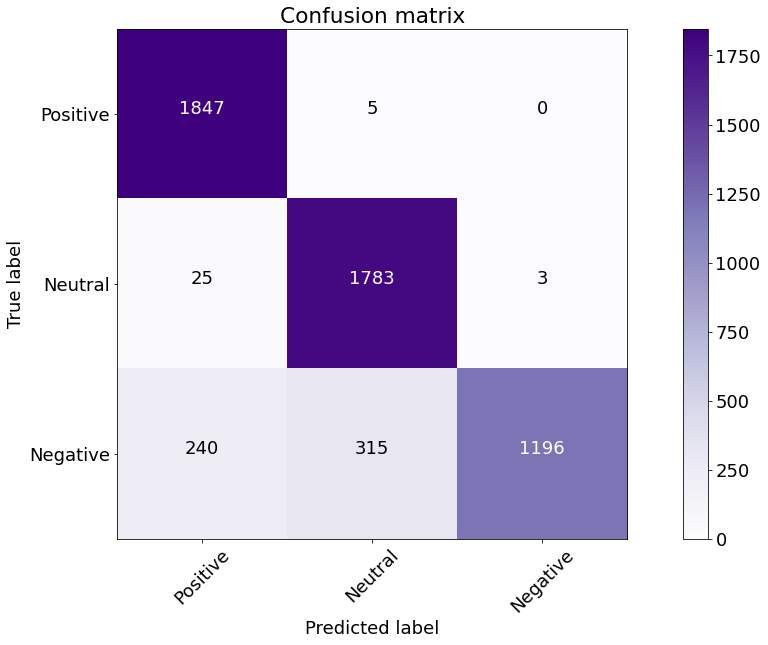

In [ ]:
y_obt = m2.predict(x_te)
cm_ELM = metrics.confusion_matrix(np.argmax(y_te, axis=1), np.argmax(y_obt,axis=1))
plot_confusion_matrix(cm_ELM, classes = ['Positive','Neutral','Negative'])

In [ ]:
print("Classification Report of ELM :\n",classification_report(np.argmax(y_te, axis=1), np.argmax(y_obt,axis=1)))

Classification Report of SVC :
               precision    recall  f1-score   support

           0       0.87      1.00      0.93      1852
           1       0.85      0.98      0.91      1811
           2       1.00      0.68      0.81      1751

    accuracy                           0.89      5414
   macro avg       0.91      0.89      0.88      5414
weighted avg       0.91      0.89      0.89      5414

